# New data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
rootdir = '/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline'
# expname = 'hannewnet_1000_256_64_imbalance_pretrain_balance_all_data'
expname = 'balance_batch32_epoch40_all_data'
# expname = 'all_data_batch64_epoch20_balance'
files = [f for f in os.listdir(f'{rootdir}/preds/{expname}') if 'RandomSampling_30' in f]
# files = list(set([f[:-5] for f in files]))
files

['LINCS_PC3_RandomSampling_30_0_957_20240710_191222__0.csv',
 'LINCS_A549_RandomSampling_30_0_642_20240710_191220__1.csv',
 'LINCS_PC3_RandomSampling_30_0_957_20240710_191222__1.csv',
 'LINCS_MCF7_RandomSampling_30_0_810_20240711_181613__4.csv',
 'LINCS_MCF7_RandomSampling_30_0_810_20240711_181613__3.csv',
 'LINCS_A549_RandomSampling_30_0_642_20240710_191220__0.csv',
 'LINCS_MCF7_RandomSampling_30_0_810_20240710_191223__2.csv',
 'LINCS_MCF7_RandomSampling_30_0_810_20240710_191223__1.csv',
 'LINCS_PC3_RandomSampling_30_0_957_20240711_181612__4.csv',
 'LINCS_PC3_RandomSampling_30_0_957_20240711_181612__3.csv',
 'LINCS_PC3_RandomSampling_30_0_957_20240710_191222__2.csv',
 'LINCS_A549_RandomSampling_30_0_642_20240711_181612__4.csv',
 'LINCS_A549_RandomSampling_30_0_642_20240711_181612__3.csv',
 'LINCS_A549_RandomSampling_30_0_642_20240710_191220__2.csv',
 'LINCS_MCF7_RandomSampling_30_0_810_20240710_191223__0.csv']

## MCF7

LINCS_MCF7_RandomSampling_30_0_810_20240711_181613__4.csv
LINCS_MCF7_RandomSampling_30_0_810_20240711_181613__3.csv
LINCS_MCF7_RandomSampling_30_0_810_20240710_191223__2.csv
LINCS_MCF7_RandomSampling_30_0_810_20240710_191223__1.csv
LINCS_MCF7_RandomSampling_30_0_810_20240710_191223__0.csv


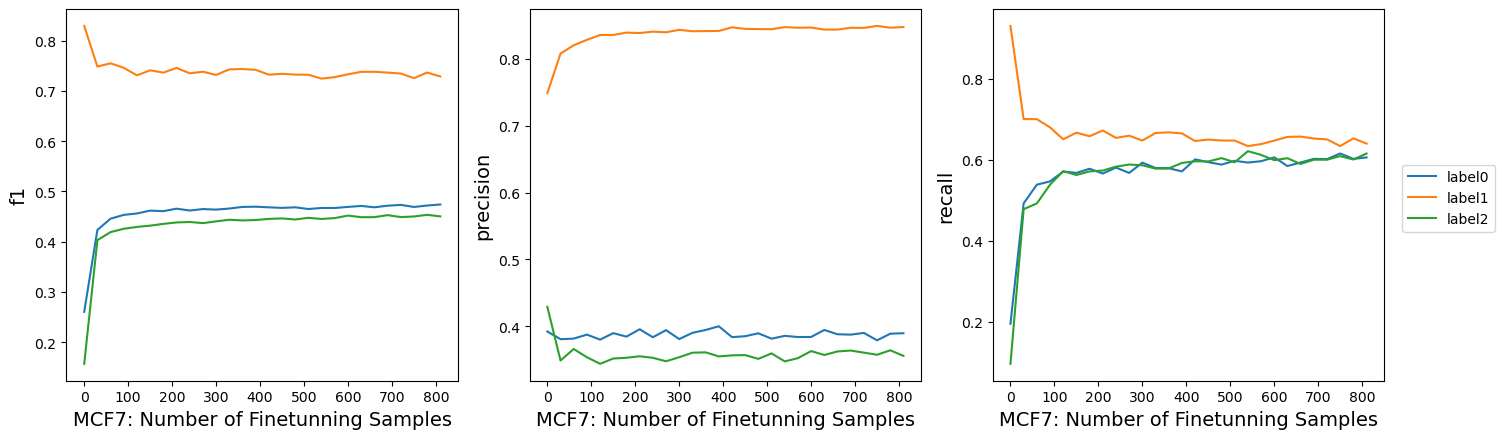

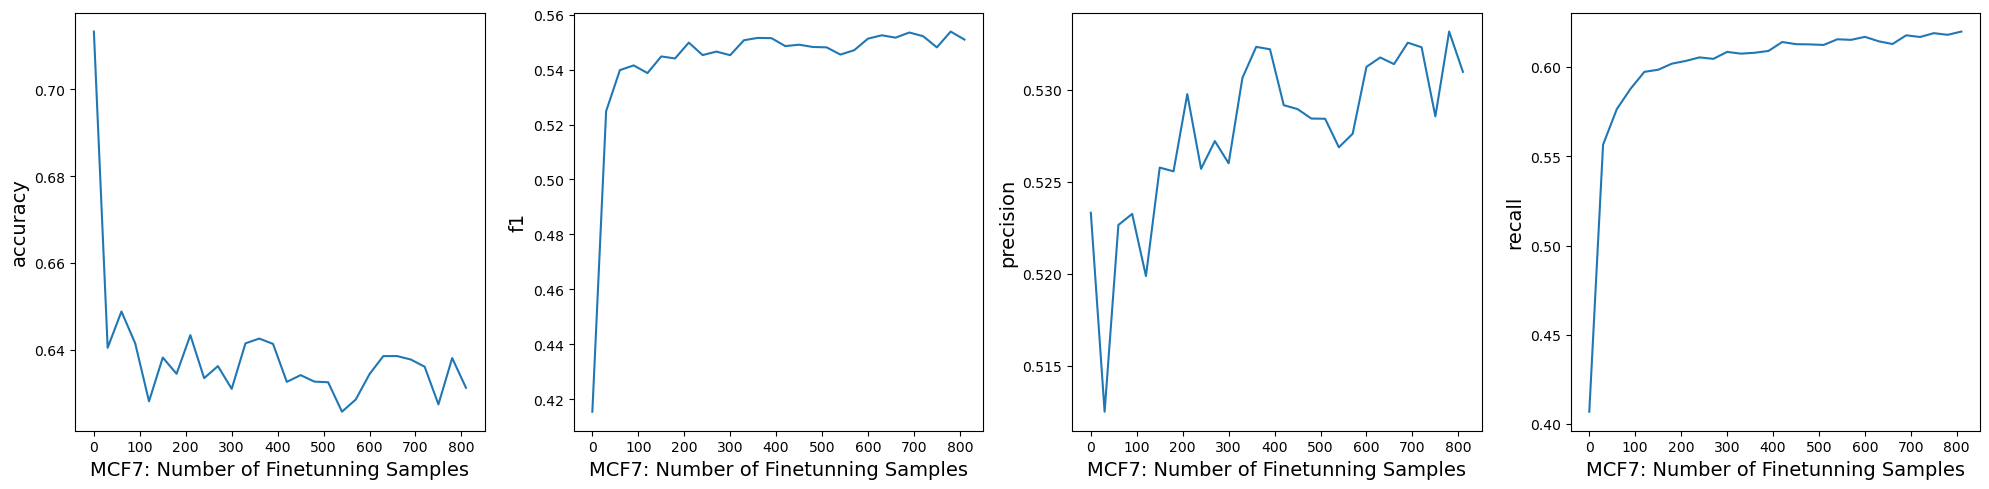

In [12]:
cell = 'MCF7'
round_num = 28
font = 14
repeat = 5

f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)

fc = [f for f in files if cell in f]

for f in fc:
    print(f)
    pred_data = f'{rootdir}/preds/{expname}/{f}'
    data = pd.read_csv(pred_data).T.to_numpy()
    # print(data.shape)
    # for i in range(1,28):
    f1 += np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    precision += np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall += np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy += np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    # print(f1.shape, precision.shape, recall.shape, accuracy.shape)
    
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
x = [x*30 for x in range(round_num)]
[ax[0].plot(x, f1[i]/repeat, label=f'label{i}') for i in range(3)]
[ax[1].plot(x, precision[i]/repeat, label=f'label{i}') for i in range(3)]
[ax[2].plot(x, recall[i]/repeat, label=f'label{i}') for i in range(3)]
ax[0].set_ylabel('f1', size=font)
ax[1].set_ylabel('precision', size=font)
ax[2].set_ylabel('recall', size=font)
[ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(3)]
plt.legend(bbox_to_anchor=(1.3, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(x, accuracy/repeat, label='accuracy')
ax[0].set_ylabel('accuracy', size=font)
ax[1].plot(x, np.mean(f1, axis=0)/repeat, label='f1')
ax[1].set_ylabel('f1', size=font)
ax[2].plot(x, np.mean(precision, axis=0)/repeat, label='precision')
ax[2].set_ylabel('precision', size=font)
ax[3].plot(x, np.mean(recall, axis=0)/repeat, label='recall')
ax[3].set_ylabel('recall', size=font)

[ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(4)]
# plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

x_mcf7, f1_mcf7 = x, np.mean(f1, axis=0)/repeat

## A549

LINCS_A549_RandomSampling_30_0_642_20240710_191220__1.csv
LINCS_A549_RandomSampling_30_0_642_20240710_191220__0.csv
LINCS_A549_RandomSampling_30_0_642_20240711_181612__4.csv
LINCS_A549_RandomSampling_30_0_642_20240711_181612__3.csv
LINCS_A549_RandomSampling_30_0_642_20240710_191220__2.csv


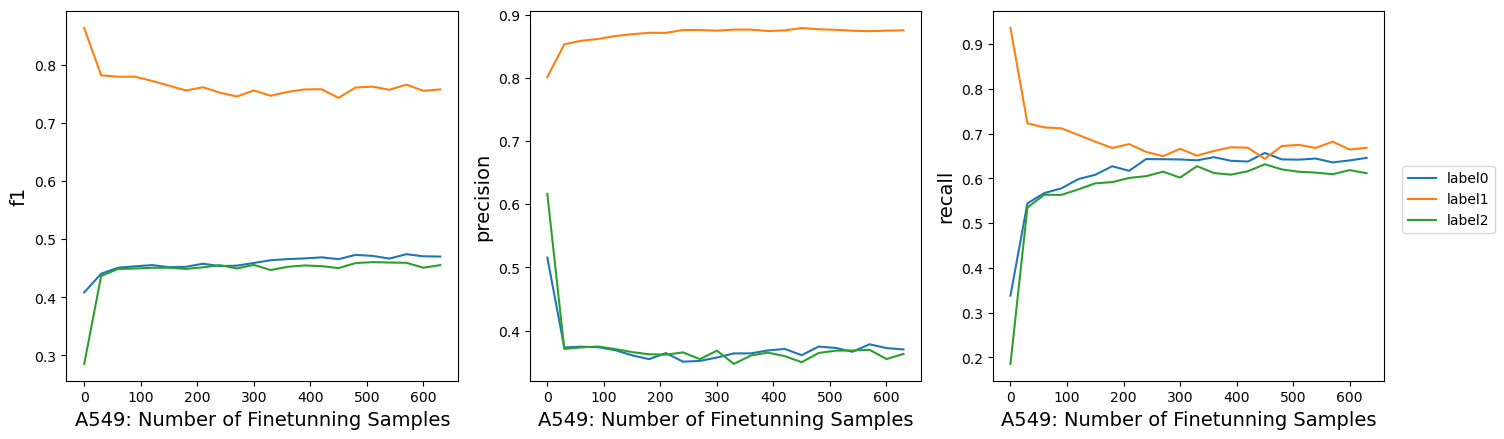

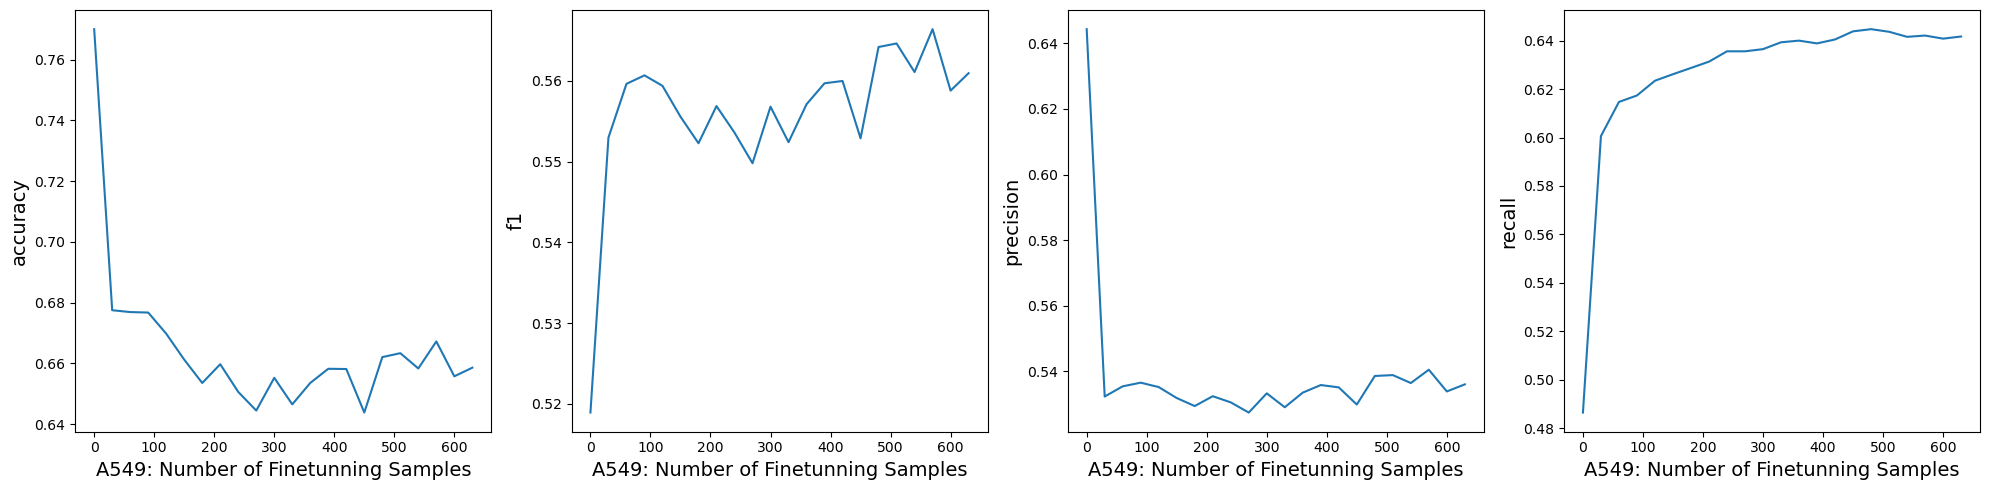

In [14]:
cell = 'A549'
round_num = 22
font = 14
repeat = 5

f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)

fc = [f for f in files if cell in f]

for f in fc:
    print(f)
    pred_data = f'{rootdir}/preds/{expname}/{f}'
    data = pd.read_csv(pred_data).T.to_numpy()
    # print(data.shape)
    # for i in range(1,28):
    f1 += np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    precision += np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall += np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy += np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    # print(f1.shape, precision.shape, recall.shape, accuracy.shape)
    
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
x = [x*30 for x in range(round_num)]
[ax[0].plot(x, f1[i]/repeat, label=f'label{i}') for i in range(3)]
[ax[1].plot(x, precision[i]/repeat, label=f'label{i}') for i in range(3)]
[ax[2].plot(x, recall[i]/repeat, label=f'label{i}') for i in range(3)]
ax[0].set_ylabel('f1', size=font)
ax[1].set_ylabel('precision', size=font)
ax[2].set_ylabel('recall', size=font)
[ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(3)]
plt.legend(bbox_to_anchor=(1.3, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(x, accuracy/repeat, label='accuracy')
ax[0].set_ylabel('accuracy', size=font)
ax[1].plot(x, np.mean(f1, axis=0)/repeat, label='f1')
ax[1].set_ylabel('f1', size=font)
ax[2].plot(x, np.mean(precision, axis=0)/repeat, label='precision')
ax[2].set_ylabel('precision', size=font)
ax[3].plot(x, np.mean(recall, axis=0)/repeat, label='recall')
ax[3].set_ylabel('recall', size=font)

[ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(4)]
# plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

x_a549, f1_a549 = x, np.mean(f1, axis=0)/repeat


In [19]:
# ### double check with logfile
# def metrics_from_txt(fname):
#     paragraph = []
#     with open(fname) as f:
#         for sentence in f.readlines():
#             # print(sentence)
#             if sentence.startswith('Round'):
#                 # print(sentence[:-1])
#                 if sentence == 'Round 0:\n':
#                     paragraph.append(sentence[:-2])
#                 else:
#                     paragraph.append(sentence[:-2])
#             elif sentence.startswith('testing '):
#                 # print(sentence[:-1])
#                 paragraph.append(sentence[:-1])
#             elif sentence.startswith('!!!!!total used time:'):
#                 time = float(sentence.split(' ')[-1])
#     # print(paragraph)
#     data_dict = {}
#     for n in range(len(paragraph)//3):
#         roundnum = paragraph[3*n].split()[1]
#         acc = paragraph[3*n+1].split()
#         f1 = paragraph[3*n+2].split()
#         if int(roundnum) not in data_dict:
#             data_dict[int(roundnum)] = {acc[1]:[float(acc[2])], f1[1]:[float(f1[2])]}
#         elif int(roundnum) in data_dict:
#             data_dict[int(roundnum)][acc[1]].append(float(acc[2]))
#             data_dict[int(roundnum)][f1[1]].append(float(f1[2]))
#     for n in range(round_num):
#         data_dict[n]['accuracy'] = np.mean(data_dict[n]['accuracy'])
#         data_dict[n]['F1'] = np.mean(data_dict[n]['F1'])
#     df = pd.DataFrame.from_dict(data_dict).T
#     # print(df)
#     return df, time

# fig, ax = plt.subplots(1,2, figsize=(10,5))
# df, time = metrics_from_txt('/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile/LINCS_A549_RandomSampling_30_0_642_20240704_184727_.txt')
# x = [x*10 for x in df.index.to_list()]
# acc = df.accuracy.to_list()
# f1 = df.F1.to_list()
# ax[0].set_title('A549', size=font)
# ax[0].plot(x, acc, label='random')
# ax[1].plot(x, f1, label='random')
# ax[0].set_ylabel('Accuracy', size=font)
# ax[1].set_ylabel('F1-score', size=font)
# ax[1].set_xlabel('Number of Finetunning Samples', size=font)
# plt.legend(bbox_to_anchor=(1.0, 0.6))
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

## PC3

LINCS_PC3_RandomSampling_30_0_957_20240710_191222__0.csv
LINCS_PC3_RandomSampling_30_0_957_20240710_191222__1.csv
LINCS_PC3_RandomSampling_30_0_957_20240711_181612__4.csv
LINCS_PC3_RandomSampling_30_0_957_20240711_181612__3.csv
LINCS_PC3_RandomSampling_30_0_957_20240710_191222__2.csv


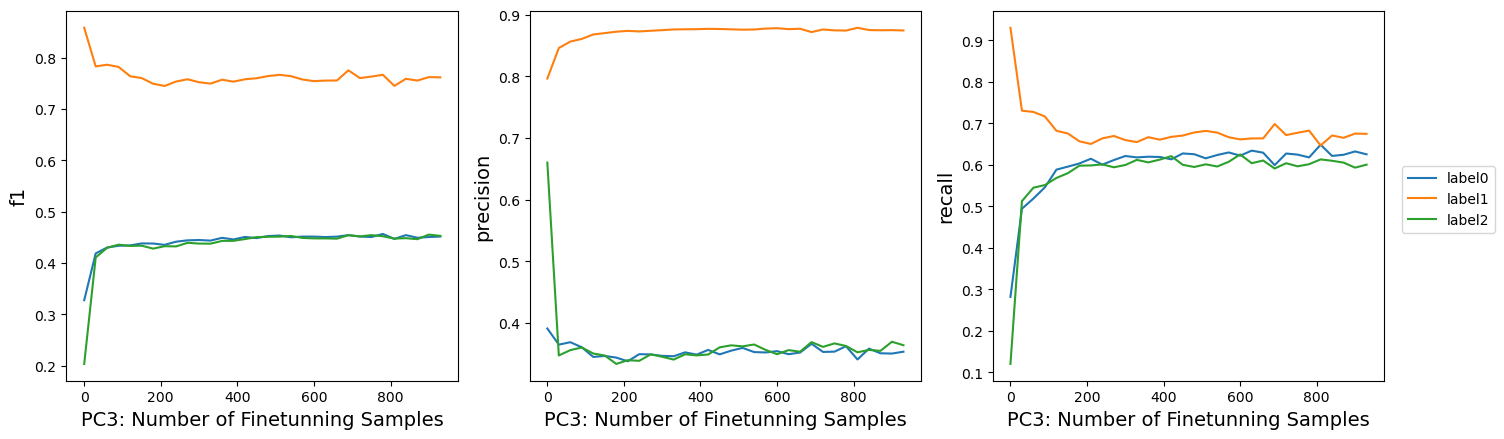

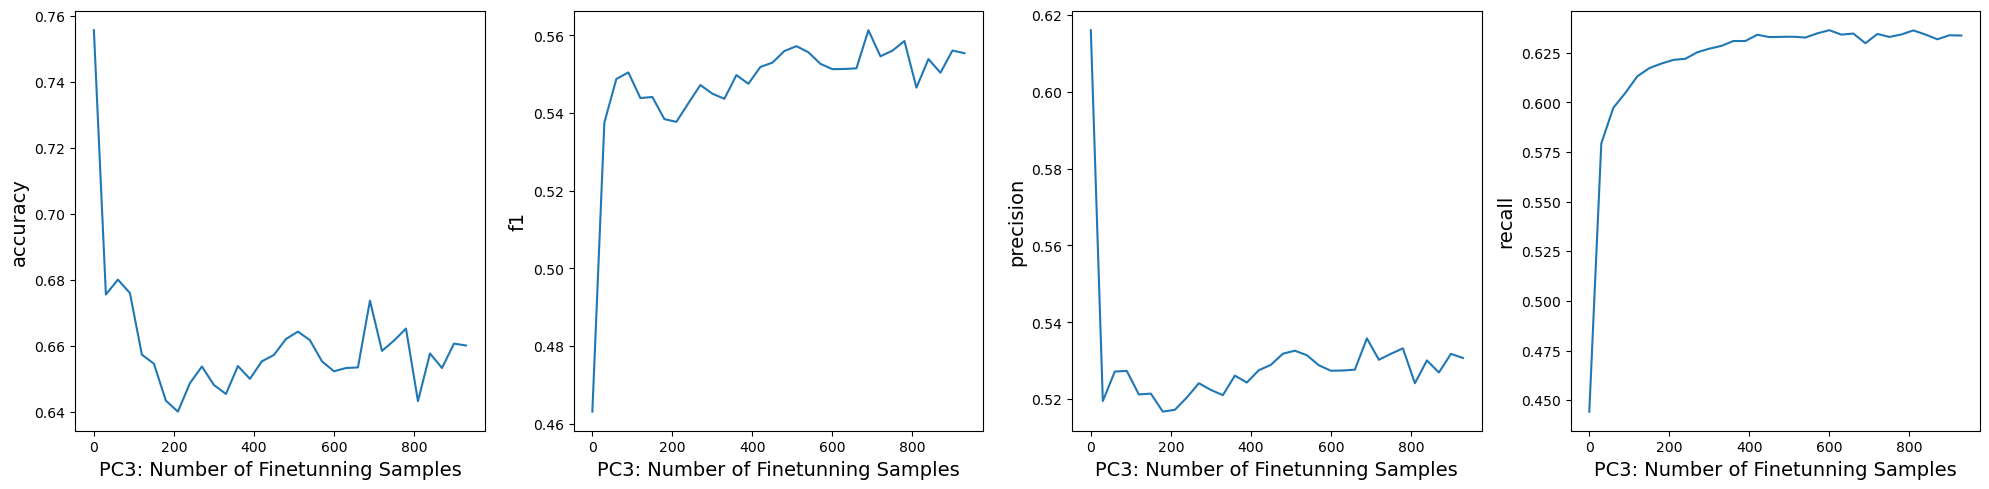

In [16]:
cell = 'PC3'
round_num = 32
font = 14
repeat = 5

f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)

fc = [f for f in files if cell in f]

for f in fc:
    print(f)
    pred_data = f'{rootdir}/preds/{expname}/{f}'
    data = pd.read_csv(pred_data).T.to_numpy()
    # print(data.shape)
    # for i in range(1,28):
    f1 += np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    precision += np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall += np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy += np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    # print(f1.shape, precision.shape, recall.shape, accuracy.shape)
    
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
x = [x*30 for x in range(round_num)]
[ax[0].plot(x, f1[i]/repeat, label=f'label{i}') for i in range(3)]
[ax[1].plot(x, precision[i]/repeat, label=f'label{i}') for i in range(3)]
[ax[2].plot(x, recall[i]/repeat, label=f'label{i}') for i in range(3)]
ax[0].set_ylabel('f1', size=font)
ax[1].set_ylabel('precision', size=font)
ax[2].set_ylabel('recall', size=font)
[ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(3)]
plt.legend(bbox_to_anchor=(1.3, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(x, accuracy/repeat, label='accuracy')
ax[0].set_ylabel('accuracy', size=font)
ax[1].plot(x, np.mean(f1, axis=0)/repeat, label='f1')
ax[1].set_ylabel('f1', size=font)
ax[2].plot(x, np.mean(precision, axis=0)/repeat, label='precision')
ax[2].set_ylabel('precision', size=font)
ax[3].plot(x, np.mean(recall, axis=0)/repeat, label='recall')
ax[3].set_ylabel('recall', size=font)

[ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(4)]
# plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

x_pc3, f1_pc3 = x, np.mean(f1, axis=0)/repeat

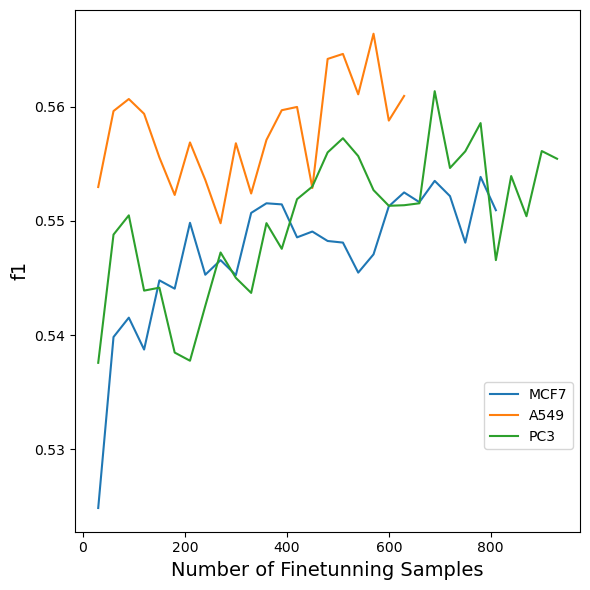

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_mcf7[1:], f1_mcf7[1:], label='MCF7')
ax.plot(x_a549[1:], f1_a549[1:], label='A549')
ax.plot(x_pc3[1:], f1_pc3[1:], label='PC3')
ax.set_ylabel('f1', size=font)
ax.set_xlabel('Number of Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.3))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

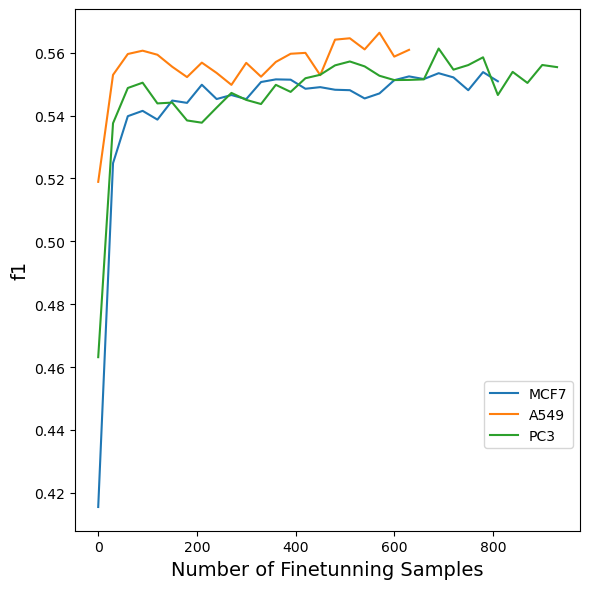

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_mcf7, f1_mcf7, label='MCF7')
ax.plot(x_a549, f1_a549, label='A549')
ax.plot(x_pc3, f1_pc3, label='PC3')
ax.set_ylabel('f1', size=font)
ax.set_xlabel('Number of Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.3))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()